## 손실함수

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os
import numpy as np
import pandas as pd
sys.path.append(os.pardir) #이건 나도 잘모르겠어 부모 디렉토리에서 갖고온데..?
from dataset.mnist import load_mnist

#### MNIST 데이터 셋 로드

In [102]:
(x_trian, t_train), (t_test, t_test) = load_mnist(flatten= True, normalize = True, one_hot_label=True) #데이터 로드 이런식으로 한다.

In [103]:
np.set_printoptions(linewidth = 200, threshold = 1000) #이건 강의 코드 #프린트하는 출력 옵션 설정해주는 코드

In [104]:
x_trian[0].shape #이게 한장의 데이터란 소리잖어 이게 input으로 들어감

(784,)

In [105]:
import pickle

def get_data():
    (x_train, t_train), (x_test, t_test) = \
        load_mnist(normalize=True, flatten=True, one_hot_label=True)
    return x_test, t_test #테스트 데이터 반환

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        # 학습된 가중치 매개변수가 담긴 파일
        # 학습 없이 바로 추론을 수행
        network = pickle.load(f)

    return network

In [106]:
def sigmoid(x):
    y=1/(1+np.exp(-x))
    
    return y

def softmax(a):
    c = np.max(a) 
    exp_a = np.exp(a - c)
    y = exp_a / np.sum(exp_a)
    return y

In [107]:
def predict(network, x):
    w1, w2, w3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, w1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, w2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, w3) + b3
    y = softmax(a3)
    
    return y #10가지의 추론 값들 확률

In [108]:
x, t= get_data() #테스트 데이터
network = init_network()

In [109]:
print(x.shape) #input
print(t.shape) #label #내가 원핫인코딩해서 라벨값으로 나타남.

(10000, 784)
(10000, 10)


In [110]:
#데이터 프레임으로 변환
df = pd.DataFrame(x)

for i in np.arange(0,10):
    df['target'+' '+str(i)] = t[:,i]

In [111]:
df

,0,1,2,3,4,5,6,7,8,9,...,target 0,target 1,target 2,target 3,target 4,target 5,target 6,target 7,target 8,target 9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [117]:
print(np.sum(t)) #확률값이 나와야함

10000.0


In [112]:
# 신경망 학습 구현
y = predict(network, x)
print(y) #학습된 신경망 예측 확률
print()
print(y.shape)

[[2.6744653e-08 8.3487456e-10 2.2669218e-07 ... 3.1590267e-04 2.9701406e-09 2.5926786e-07]
 [1.9413324e-07 4.4338755e-08 3.7902842e-05 ... 5.1012347e-11 5.1637876e-08 1.9213177e-12]
 [3.5380995e-12 3.3780452e-05 1.4651681e-07 ... 7.7535809e-08 4.2282117e-08 2.9619232e-09]
 ...
 [1.9153399e-11 2.7681266e-09 2.8718106e-09 ... 2.9553929e-08 2.3387435e-07 8.6690488e-07]
 [9.2824193e-09 1.1410888e-08 1.8581948e-09 ... 5.6684063e-10 1.2815899e-06 1.3370182e-09]
 [1.3560712e-07 6.3381395e-10 8.0339544e-07 ... 1.3755666e-10 2.0161592e-09 1.1938008e-10]]

(10000, 10)


In [68]:
pd.DataFrame(y) #각각 구현된 확률

,0,1,2,3,4,5,6,7,8,9
0,2.674465e-08,8.348746e-10,2.266922e-07,3.987741e-07,3.715802e-10,1.425458e-08,5.154645e-12,3.159027e-04,2.970141e-09,2.592679e-07
1,1.941332e-07,4.433875e-08,3.790284e-05,5.743777e-07,2.287596e-11,2.679803e-07,1.105205e-06,5.101235e-11,5.163788e-08,1.921318e-12
2,3.538100e-12,3.378045e-05,1.465168e-07,6.090937e-08,4.499648e-09,2.593922e-08,1.601663e-08,7.753581e-08,4.228212e-08,2.961923e-09
3,1.027019e-04,8.483284e-12,1.643297e-07,1.960571e-08,4.464280e-10,3.482996e-07,4.200896e-08,2.396486e-08,4.996104e-09,4.343084e-09
4,2.955690e-09,9.390306e-11,4.133721e-08,4.759023e-10,1.365648e-05,6.888787e-09,2.916831e-08,7.848188e-08,2.055235e-08,4.669373e-07
...,...,...,...,...,...,...,...,...,...,...
9995,8.999876e-09,4.178155e-08,2.695699e-04,2.313878e-06,1.093534e-11,6.739021e-09,1.872881e-09,1.987172e-08,1.853390e-07,5.976986e-11
9996,2.812811e-08,1.130833e-08,7.622695e-07,1.240138e-04,9.887328e-12,9.590946e-08,1.566721e-10,4.449518e-08,3.650791e-08,2.441741e-09
9997,1.915340e-11,2.768127e-09,2.871811e-09,1.716916e-09,3.810101e-05,2.809184e-08,1.146162e-08,2.955393e-08,2.338743e-07,8.669049e-07
9998,9.282419e-09,1.141089e-08,1.858195e-09,9.545563e-09,1.883632e-08,1.349133e-05,4.073839e-08,5.668406e-10,1.281590e-06,1.337018e-09


In [70]:
pd.DataFrame(t) #원래 값 원핫인코딩

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


#### 오차제곱합

In [71]:
def sum_squares_error(y, t):
    return 0.5* np.sum((y-t)**2)

In [78]:
print(t[0])
print(y[0]) #이런식으로 각각 오차제곱합 구현

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[2.6744653e-08 8.3487456e-10 2.2669218e-07 3.9877415e-07 3.7158018e-10 1.4254581e-08 5.1546445e-12 3.1590267e-04 2.9701406e-09 2.5926786e-07]


In [79]:
sum_squares_error(t[0], y[0]) #하나하나 전부 이러면 시간이 너무 오래 걸림

0.49968414723003396

#### 교차 엔트로피 오차

In [91]:
def cross_entropy_error(y, t):
    delta = 1e-7  #log0은 0이니
    return -np.sum(t * np.log(y+delta))

C:\Users\user\AppData\Local\Temp\ipykernel_1900\1251285112.py:2: RuntimeWarning: invalid value encountered in log
  y1 = -np.log(x)


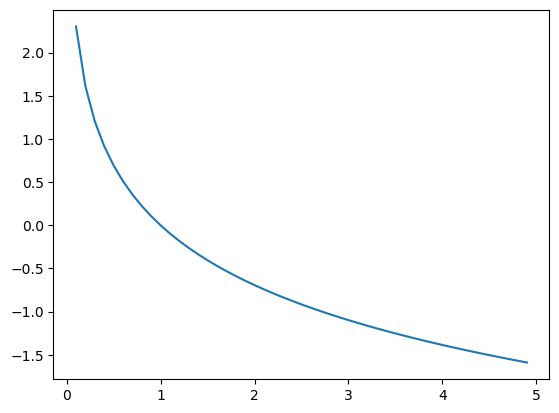

In [114]:
x = np.arange(-5,5, 0.1)
y1 = -np.log(x) 


plt.plot(x, y1)
plt.show() #손실함수 두 확률분포사이의 거리 값이 커질수록 작아짐

In [113]:
cross_entropy_error(t[0], y[0])

1.4988430147533301e-05

#### 배치 학습